In [1]:
%matplotlib inline

Euclidean k-means
16.434 --> 9.437 --> 9.437 --> 
DBA k-means
Init 1
1.061 --> 0.473 --> 0.473 --> 0.473 --> 
Soft-DTW k-means
2.475 --> 0.169 --> 0.169 --> 


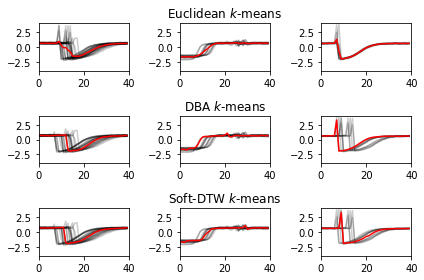

In [2]:
import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

seed = 0
numpy.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = X_train[y_train < 4]  # Keep first 3 classes
numpy.random.shuffle(X_train)
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])  # Keep only 50 time series
X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)  # Make time series shorter
sz = X_train.shape[1]

# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=3, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

plt.figure()
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 1:
        plt.title("Euclidean $k$-means")

# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=3, n_init=2, metric="dtw", verbose=True, max_iter_barycenter=10, random_state=seed)
y_pred = dba_km.fit_predict(X_train)

for yi in range(3):
    plt.subplot(3, 3, 4 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 1:
        plt.title("DBA $k$-means")

# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=3, metric="softdtw", metric_params={"gamma_sdtw": .01},
                           verbose=True, random_state=seed)
y_pred = sdtw_km.fit_predict(X_train)

for yi in range(3):
    plt.subplot(3, 3, 7 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()

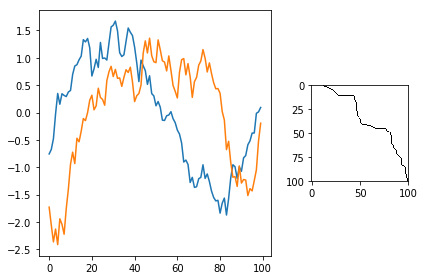

In [3]:
from tslearn.generators import random_walks
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn import metrics

numpy.random.seed(0)
n_ts, sz, d = 2, 100, 1
dataset = random_walks(n_ts=n_ts, sz=sz, d=d)
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
dataset_scaled = scaler.fit_transform(dataset)

path, sim = metrics.dtw_path(dataset_scaled[0], dataset_scaled[1])

matrix_path = numpy.zeros((sz, sz), dtype=numpy.int)
for i, j in path:
    matrix_path[i, j] = 1

plt.figure()

plt.subplot2grid((1, 3), (0, 0), colspan=2)
plt.plot(numpy.arange(sz), dataset_scaled[0, :, 0])
plt.plot(numpy.arange(sz), dataset_scaled[1, :, 0])
plt.subplot(1, 3, 3)
plt.imshow(matrix_path, cmap="gray_r")

plt.tight_layout()

Init 1
80.948 --> 70.106 --> 66.011 --> 63.422 --> 59.720 --> 58.005 --> 57.563 --> 57.563 --> 
Init 2
80.519 --> 70.023 --> 66.522 --> 65.914 --> 65.914 --> 
Init 3
80.374 --> 67.064 --> 62.859 --> 62.220 --> 59.391 --> 59.391 --> 
Init 4
77.700 --> 69.585 --> 67.474 --> 67.022 --> 66.104 --> 65.075 --> 63.516 --> 62.861 --> 62.410 --> 61.166 --> 59.759 --> 59.759 --> 
Init 5
79.246 --> 66.190 --> 63.040 --> 63.040 --> 
Init 6
78.590 --> 68.315 --> 66.321 --> 65.633 --> 63.898 --> 63.898 --> 
Init 7
75.299 --> 63.203 --> 59.963 --> 57.563 --> 57.563 --> 
Init 8
76.876 --> 67.042 --> 66.764 --> 66.764 --> 
Init 9
81.317 --> 69.313 --> 63.927 --> 61.124 --> 59.391 --> 59.391 --> 
Init 10
79.317 --> 72.390 --> 70.197 --> 70.218 --> 70.218 --> 
Init 11
78.202 --> 66.888 --> 60.961 --> 57.946 --> 57.387 --> 57.387 --> 
Init 12
78.194 --> 67.992 --> 65.263 --> 63.436 --> 61.177 --> 57.799 --> 57.387 --> 57.387 --> 
Init 13
77.553 --> 64.028 --> 64.008 --> 64.008 --> 
Init 14
77.853 --> 62.8

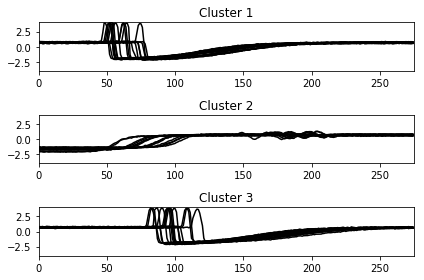

In [4]:
import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import GlobalAlignmentKernelKMeans
from tslearn.metrics import sigma_gak, cdist_gak
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

seed = 0
numpy.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = X_train[y_train < 4]  # Keep first 3 classes
numpy.random.shuffle(X_train)
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])  # Keep only 50 time series
sz = X_train.shape[1]

gak_km = GlobalAlignmentKernelKMeans(n_clusters=3, sigma=sigma_gak(X_train), n_init=20, verbose=True, random_state=seed)
y_pred = gak_km.fit_predict(X_train)

plt.figure()
for yi in range(3):
    plt.subplot(3, 1, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.title("Cluster %d" % (yi + 1))

plt.tight_layout()